# Keras CV for image classification

# a) Classificaton with KerasCV

## a.i) Transfer Learning (direct inference)

In [1]:
!pip install keras_cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 23.0 MB/s eta 0:00:00


In [31]:
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
from tensorflow.python import test
train_images = train_images/255
test_images = test_images/255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes = 10)

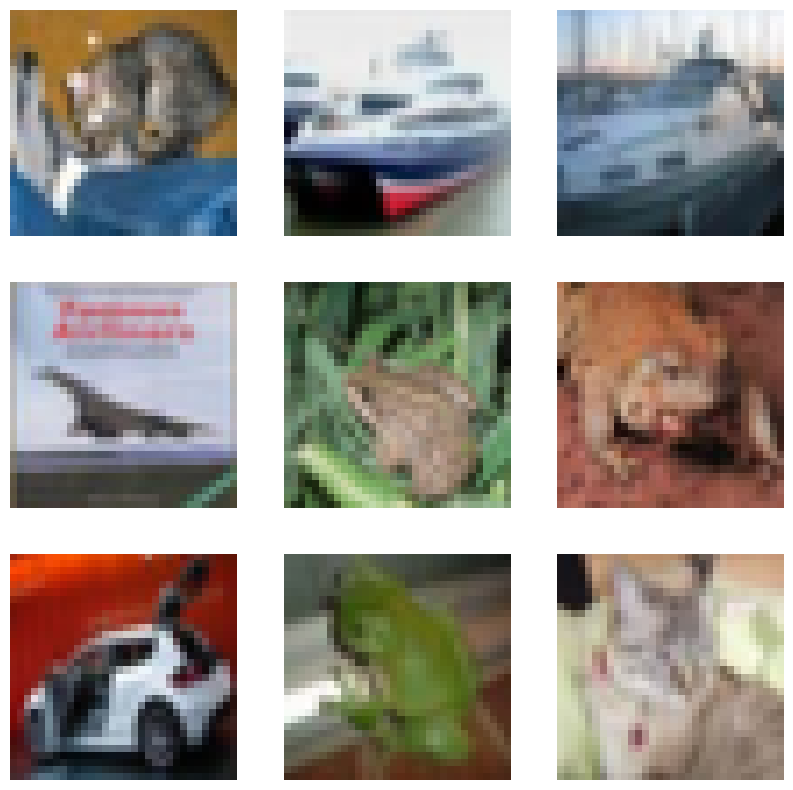

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.5381 - accuracy: 0.4765 - val_loss: 1.3785 - val_accuracy: 0.5264
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3100 - accuracy: 0.5531 - val_loss: 1.3004 - val_accuracy: 0.5519
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2512 - accuracy: 0.5724 - val_loss: 1.2664 - val_accuracy: 0.5617
Epoch 4/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2180 - accuracy: 0.5827 - val_loss: 1.2477 - val_accuracy: 0.5668
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1964 - accuracy: 0.5893 - val_loss: 1.2302 - val_accuracy: 0.5735
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1810 - accuracy: 0.5936 - val_loss: 1.2324 - val_accuracy: 0.5733
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1682 - accuracy: 0.5989 - val_loss: 1.2175 -

In [12]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

vgg_model.layers.pop()

num_classes = 10

x = Flatten()(vgg_model.output)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg_model.input, outputs = output)

for layer in model.layers[:-1]:
  layer.trainable = False

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, batch_size = 32, epochs = 10, validation_data = (test_images, test_labels))

loss, accuracy = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images[:9])


In [17]:
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 1.1967
Test accuracy: 0.5848


##a.ii) fine tuning

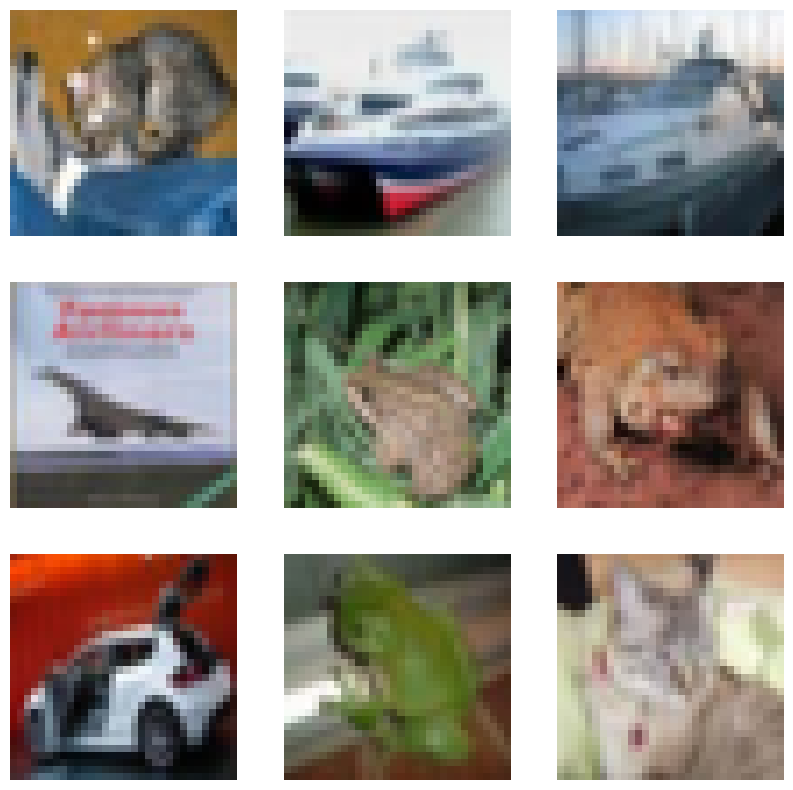

Epoch 1/10
1563/1563 [==============================] - 53s 29ms/step - loss: 1.7093 - accuracy: 0.3199 - val_loss: 1.3444 - val_accuracy: 0.4753
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2208 - accuracy: 0.5445 - val_loss: 1.0652 - val_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9627 - accuracy: 0.6611 - val_loss: 0.8880 - val_accuracy: 0.6917
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8067 - accuracy: 0.7198 - val_loss: 0.8456 - val_accuracy: 0.7162
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6969 - accuracy: 0.7605 - val_loss: 0.7863 - val_accuracy: 0.7424
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.6130 - accuracy: 0.7936 - val_loss: 0.7275 - val_accuracy: 0.7527
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.5621 - accuracy: 0.8107 - val_loss: 1.1805 -

In [20]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

num_classes = 10

x = Flatten()(vgg_model.output)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg_model.input, outputs = output)


  
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, batch_size = 32, epochs = 10, validation_data = (test_images, test_labels))

loss_fine_tune, accuracy_fine_tune = model.evaluate(test_images, test_labels)

In [22]:
predictions = model.predict(test_images[:9])



1/1 [==============================] - 0s 80ms/step


In [23]:
print(f"Test loss: {loss_fine_tune:.4f}")
print(f"Test accuracy: {accuracy_fine_tune:.4f}")

Test loss: 0.7139
Test accuracy: 0.7923


##a.iii) image classifier from scratch



In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

loss_scratch, accuracy_scratch = model.evaluate(test_images, test_labels)


Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.3838 - accuracy: 0.4993 - val_loss: 1.0957 - val_accuracy: 0.6058
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9516 - accuracy: 0.6636 - val_loss: 0.8780 - val_accuracy: 0.6946
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7636 - accuracy: 0.7327 - val_loss: 0.7815 - val_accuracy: 0.7296
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6350 - accuracy: 0.7788 - val_loss: 0.7962 - val_accuracy: 0.7275
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5343 - accuracy: 0.8136 - val_loss: 0.7858 - val_accuracy: 0.7380
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4385 - accuracy: 0.8477 - val_loss: 0.8154 - val_accuracy: 0.7345
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3524 - accuracy: 0.8742 - val_loss: 0.8920 - val_accuracy

In [29]:
print(f"Test loss: {loss_scratch:.4f}")
print(f"Test accuracy: {accuracy_scratch:.4f}")

Test loss: 1.0982
Test accuracy: 0.7486


In [32]:
predictions = model.predict(test_images[:9])
predicted_labels = [str(np.argmax(pred)) for pred in predictions]

1/1 [==============================] - 0s 19ms/step


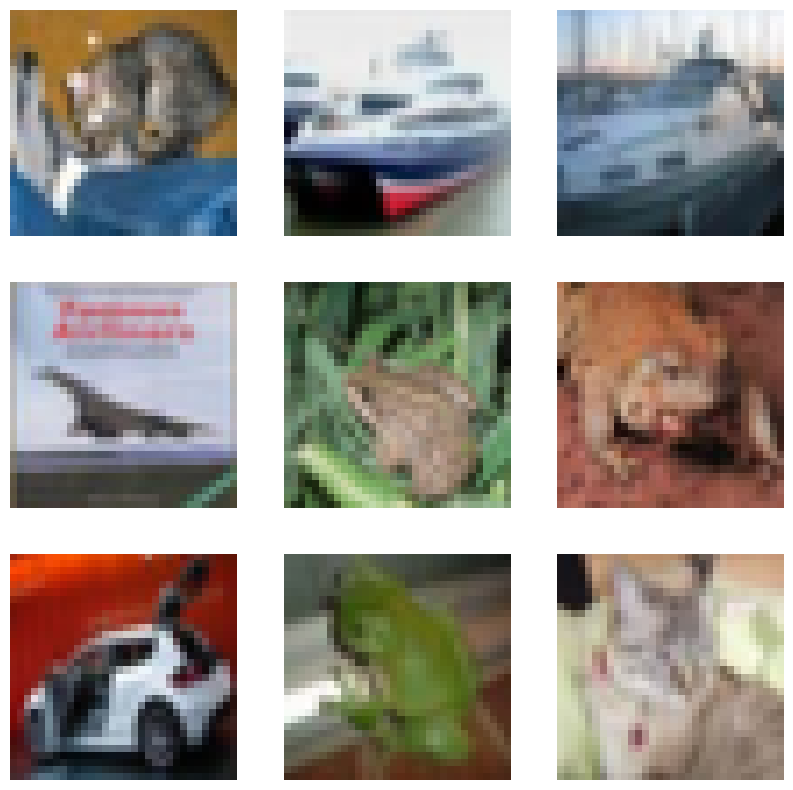

In [33]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

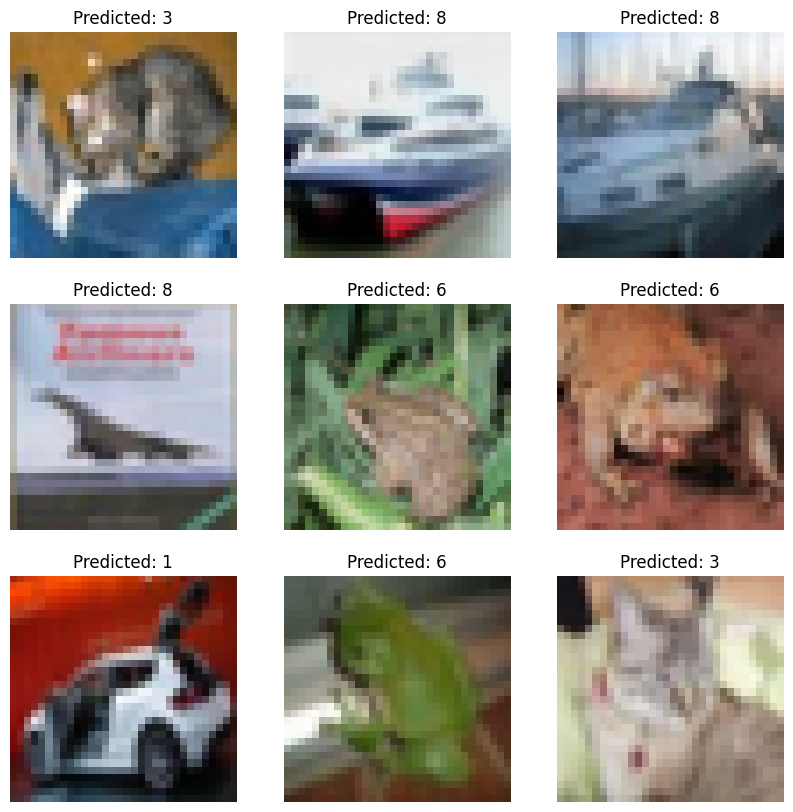

In [34]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

# b)Object Detection with Keras CV

##b.i) Transfer learn from  pretrained models, custom object model detection, use stable diffusion v2,  



In [37]:
!pip install keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import keras
import keras_cv
from keras.datasets import cifar10

from tensorflow.keras.applications import EfficientNetB0
#from keras_cv.object_detection import AnchorParameters, BBoxUtility
import numpy as np


In [45]:
!!pip install --upgrade git+https://github.com/keras-team/keras-cv


['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting git+https://github.com/keras-team/keras-cv',
 '  Cloning https://github.com/keras-team/keras-cv to /tmp/pip-req-build-1gqvs9jq',
 '  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-cv /tmp/pip-req-build-1gqvs9jq',
 '  Resolved https://github.com/keras-team/keras-cv to commit b514c84650bc2851826e63328a6185077d7c747b',
 '  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 'Requirement already satisfied: packaging in /usr/local/lib/python3.10/dist-packages (from keras-cv==0.5.0) (23.1)',
 'Requirement already satisfied: absl-py in /usr/local/lib/python3.10/dist-packages (from keras-cv==0.5.0) (1.4.0)',
 'Requirement already satisfied: regex in /usr/local/lib/python3.10/dist-packages (from 

In [46]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

In [48]:
image = [10, 20, 3]
bounding_boxes = {
  "classes": [0], # 0 is an arbitrary class ID representing "cat"
  "boxes": [[0.25, 0.4, .15, .1]]
   # bounding box is in "rel_xywh" format
   # so 0.25 represents the start of the bounding box 25% of
   # the way across the image.
   # The .15 represents that the width is 15% of the image width.
}

In [49]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

285174392/285174392 [==============================] - 14s 0us/step


In [51]:
bounding_boxes = {
  "classes": [100, 100, 55, 75],
  "boxes": [[100, 100, 55, 75], 4]
}

1215963/1215963 [==============================] - 0s 0us/step


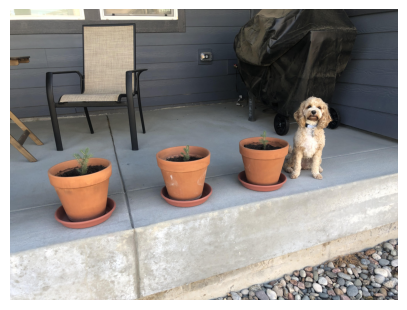

In [52]:
filepath = tf.keras.utils.get_file(origin="https://i.imgur.com/gCNcJJI.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    [image],
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [53]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
image_batch = inference_resizing([image])

In [55]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

1/1 [==============================] - 0s 103ms/step


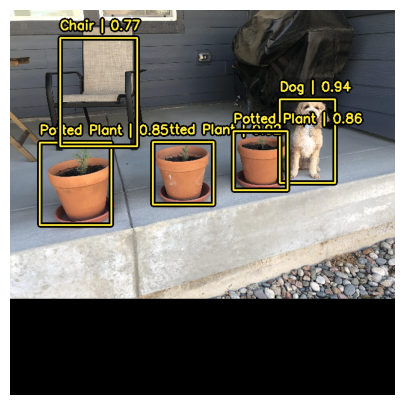

In [56]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

#c) Try various image augmentations with keras and show A/B with and without augmentation performance 



In [58]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [59]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create the base model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training without augmentation
print("Training without augmentation:")
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Training with augmentation
print("Training with augmentation:")
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Training without augmentation:
Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8888 - accuracy: 0.3254 - val_loss: 1.7233 - val_accuracy: 0.3837
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7018 - accuracy: 0.3924 - val_loss: 1.6568 - val_accuracy: 0.4051
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6325 - accuracy: 0.4158 - val_loss: 1.5852 - val_accuracy: 0.4337
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5893 - accuracy: 0.4361 - val_loss: 1.6189 - val_accuracy: 0.4219
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5622 - accuracy: 0.4443 - val_loss: 1.5782 - val_accuracy: 0.4315
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5476 - accuracy: 0.4510 - val_loss: 1.5266 - val_accuracy: 0.4632
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5250 - accuracy: 0.4593 - v

# d. High performance image generation with stable diffusion with keras cv

In [60]:
import keras_cv

In [61]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


492466864/492466864 [==============================] - 4s 0us/step


198180272/198180272 [==============================] - 3s 0us/step


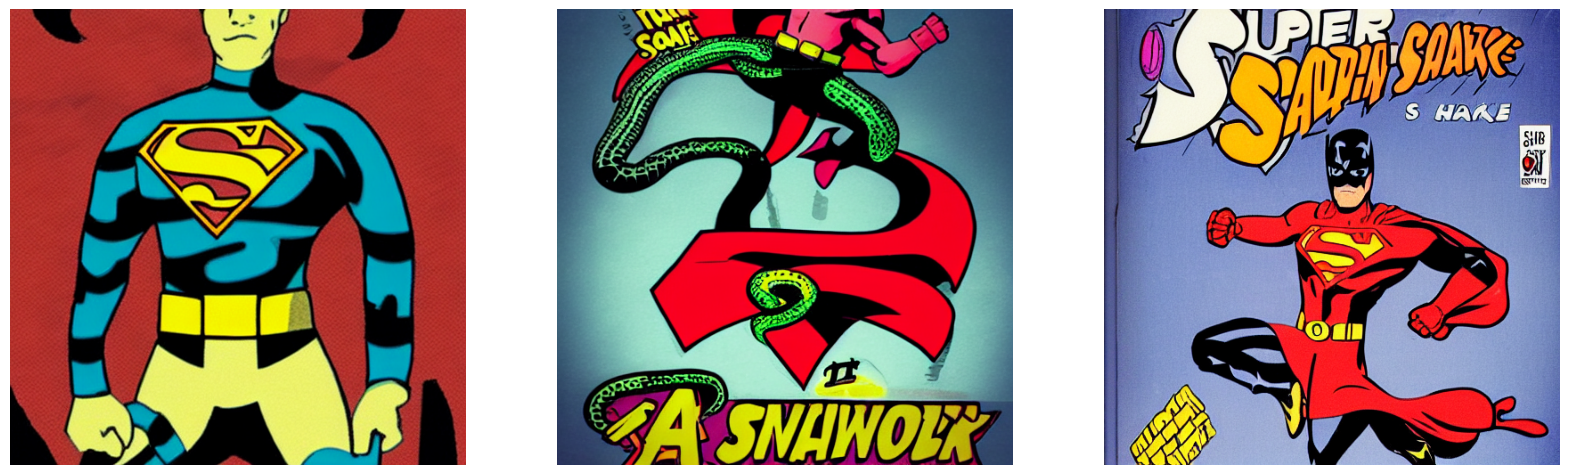

In [62]:
images = model.text_to_image("A super hero with powers of snake", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

Writing your own custom image augmentation

In [62]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Custom image augmentation function
def random_brightness(image):
    # Generate a random brightness factor between 0.7 and 1.3
    brightness_factor = np.random.uniform(0.7, 1.3)
    
    # Apply the brightness adjustment
    augmented_image = image * brightness_factor
    
    # Clip the values to the valid range [0, 255]
    augmented_image = np.clip(augmented_image, 0, 255)
    
    return augmented_image

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    preprocessing_function=random_brightness
)

# Load your image data and apply augmentation using the datagen.flow() method
x_train_augmented = datagen.flow(x_train, batch_size=32, shuffle=True)
i=0
# Iterate over the augmented data generator to visualize the augmented images
for images, labels in x_train_augmented:

    i++
    # Visualize or process the augmented images as desired
    for image in images:
        # Process each augmented image
        # Example: display the augmented image
        plt.imshow(image.astype(np.uint8))
        plt.show()
    
    # Stop the loop after a certain number of iterations
    if i>5:
        break
